In [1]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import cv2
import os

In [7]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [8]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [9]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


# Path

In [6]:
origin_path = '/home/sid2018-6/Documents/proget_interpromo'
data_path = '/Interpromo2020/Interpromo2020/All Data'
path_img_data = data_path + '/ANALYSE IMAGE'

# fic csv Studies

In [4]:
data = pd.read_csv(origin_path + data_path + '/SEATGURU_INFO_AIRCRAFT.csv',';')

In [24]:
print(data.columns)
print(data.shape)

Index(['Data_Source', 'Airline_name', 'Aircraft_Type', 'Category',
       'Flight_Type', 'Count', 'Total_seat', 'Seat_Class', 'Seat_Type',
       'Seat_Position', 'Recline', 'Premium', 'Pitch_minimum', 'Pitch_maximum',
       'Width', 'Bedlength_maximum', 'Bedlength_minimum', 'Music', 'VideoType',
       'Power_available', 'Power_kind', 'Usb_available', 'Usb_kind', 'Rating'],
      dtype='object')
(10330, 24)


In [25]:
data_etu = data[7070:8000]
data_etu

,Data_Source,Airline_name,Aircraft_Type,Category,Flight_Type,Count,Total_seat,Seat_Class,Seat_Type,Seat_Position,...,Width,Bedlength_maximum,Bedlength_minimum,Music,VideoType,Power_available,Power_kind,Usb_available,Usb_kind,Rating
7070,SeatGuru,peach,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,BULKHEAD,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,4
7071,SeatGuru,peach,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,NORMAL,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,3
7072,SeatGuru,peach,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,NORMAL,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2
7073,SeatGuru,peach,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,EXIT_ROW,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,4
7074,SeatGuru,peach,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,EXIT_ROW,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,5
7075,SeatGuru,peach,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,NORMAL,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,1
7076,SeatGuru,pegasus-airlines,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,BULKHEAD,...,17,NaN,NaN,NONE,OVERHEAD,NONE,NaN,NONE,NaN,2
7077,SeatGuru,pegasus-airlines,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,NORMAL,...,17,NaN,NaN,NONE,OVERHEAD,NONE,NaN,NONE,NaN,3
7078,SeatGuru,pegasus-airlines,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,NORMAL,...,17,NaN,NaN,NONE,OVERHEAD,NONE,NaN,NONE,NaN,2
7079,SeatGuru,pegasus-airlines,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,EXIT_ROW,...,17,NaN,NaN,NONE,OVERHEAD,NONE,NaN,NONE,NaN,4


In [26]:
list_type = data_etu['Aircraft_Type'].unique()
list_type

array(['Airbus A320-200', 'Airbus A320neo', 'Boeing 737-800', 'A350',
       'Airbus A320 B', 'Airbus A321', 'Airbus A330-300 V3',
       'Airbus A330 V3', 'Boeing 777-300ER', 'Q300', 'Q400',
       'A320-200 V1', 'Airlines Q400', 'Airways Airbus A330-200 B',
       'Airways Airbus A330-200 C', 'Airways Airbus A330-300',
       'Airways Airbus A380 B', 'Airways Boeing 717-200-125 new',
       'Airways Boeing 717-200 V3', 'Airways Boeing 737-800 V2',
       'Airways Boeing 747-400RR V2', 'Airways Boeing 747-400 4',
       'Airways Boeing 789', 'Airways Dash 8100', 'Airways Dash 8300',
       'Airways Q400', 'Airbus A319', 'Airbus A319 V2', 'Airbus A320 C',
       'Airbus A321 182pax', 'Airbus A321 196pax', 'Airbus A330-200 C',
       'Airbus A330-200 D', 'Airbus A330-200 F', 'Airbus A330-200 G',
       'Airbus A330-300', 'Airbus A330-300 B', 'Airbus A340-600',
       'Airbus A350', 'Airbus A350-900-Qsuites', 'Airbus A380',
       'Boeing 777-200LR', 'Boeing 777-200LR Qsuite',
       'Bo

In [27]:
list_comp = data_etu['Airline_name'].unique()
list_comp

array(['peach', 'pegasus-airlines', 'philippine-airlines', 'porter',
       'qantas', 'qatar-airways', 'regional-express',
       'rossiya---russian-airlines', 'royal-air-maroc', 'royal-brunei',
       'royal-jordanian', 'ryanair', 's7-airlines', 'sas', 'saudia'],
      dtype=object)

In [28]:
data_plane = data_etu.groupby('Airline_name')['Aircraft_Type'].unique().apply(list).reset_index(name='Aircraft_Type_comp')
data_plane

,Airline_name,Aircraft_Type_comp
0,peach,[Airbus A320-200]
1,pegasus-airlines,"[Airbus A320-200, Airbus A320neo, Boeing 737-800]"
2,philippine-airlines,"[A350, Airbus A320 B, Airbus A321, Airbus A330..."
3,porter,[Airlines Q400]
4,qantas,"[Airways Airbus A330-200 B, Airways Airbus A33..."
5,qatar-airways,"[Airbus A319, Airbus A319 V2, Airbus A320 B, A..."
6,regional-express,[SAAB 340B]
7,rossiya---russian-airlines,"[-800 D, A319-100 A, A319-100 B, A320-200 A, A..."
8,royal-air-maroc,"[ATR 72-600, Boeing 737-700, Boeing 737-800, B..."
9,royal-brunei,"[Airbus A320, Airbus A320 V2, Airlines Boeing ..."


In [29]:
l = []
for i in range(len(data_plane)):
    l.append(len(data_plane['Aircraft_Type_comp'][i]))
data_plane['nb_aircraft_type'] = l
data_plane

,Airline_name,Aircraft_Type_comp,nb_aircraft_type
0,peach,[Airbus A320-200],1
1,pegasus-airlines,"[Airbus A320-200, Airbus A320neo, Boeing 737-800]",3
2,philippine-airlines,"[A350, Airbus A320 B, Airbus A321, Airbus A330...",9
3,porter,[Airlines Q400],1
4,qantas,"[Airways Airbus A330-200 B, Airways Airbus A33...",13
5,qatar-airways,"[Airbus A319, Airbus A319 V2, Airbus A320 B, A...",25
6,regional-express,[SAAB 340B],1
7,rossiya---russian-airlines,"[-800 D, A319-100 A, A319-100 B, A320-200 A, A...",13
8,royal-air-maroc,"[ATR 72-600, Boeing 737-700, Boeing 737-800, B...",8
9,royal-brunei,"[Airbus A320, Airbus A320 V2, Airlines Boeing ...",3


In [30]:
sum(data_plane['nb_aircraft_type'])

112

# Test template matching

In [31]:
# origin_path = '/home/sid2018-6/Documents/proget_interpromo'
# data_path = '/Interpromo2020/Interpromo2020/All Data'
# path_img_data = data_path + '/ANALYSE IMAGE'

# img_rgb = cv2.imread(origin_path + path_img_data + 
#                      '/LAYOUT SEATGURU/Aegean_Airlines_Airbus_A320-200_plane2.svg.png')
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# template = cv2.imread(origin_path + path_img_data + 
#                       '/v8L1gg1.jpeg',0)
#w, h = template.shape[::-1]

#res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
#threshold = 0.8
#loc = np.where( res >= threshold)
#for pt in zip(*loc[::-1]):
#    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

#cv2.imwrite('res.png',img_rgb)

## get the title of images in the fic LAYOUT SEATGURU 

In [4]:
list_img_SEATGURU = os.listdir(origin_path + path_img_data + '/LAYOUT SEATGURU')
list_img_SEATGURU

['Iberia_Airbus_A321_plane498.svg.png',
 'Hong_Kong_Airlines_A330-300_V1_plane483.jpg',
 'Oman_Air_Boeing_737-700_new_plane686.jpg',
 'Air_France_ATR-72-600_plane94.svg.png',
 'Volotea_Airlines_V7_Boeing_717-200_plane328.svg.png',
 'Turkish_Airlines_Boeing_737-800_C_plane958.svg.png',
 'Azul_Airlines_Airbus_A320neo_plane242.jpg',
 'ANA_Boeing_767-300ER_A_plane295.jpg',
 'Qatar_Airways_Airbus_A321_plane746.svg.png',
 'American_Airlines_CRJ200_plane186.svg.png',
 'Aeroflot_Russian_Airlines_Airbus_A321_V2_plane10.jpg',
 'Qatar_Airways_Airbus_A350-900-Qsuites_plane733.svg.png',
 'Royal_Brunei_Airbus_A320_V2_plane773.jpg',
 'United_Airlines_Boeing_767-300_V3_plane968.svg.png',
 'Volotea_Airlines_V7_Airbus_A320-200_plane327.svg.png',
 'United_Airlines_Airbus_A320_V3_plane982.svg.png',
 'Air_Canada_Airbus_A320_B_plane34.svg.png',
 'Singapore_Air_Boeing_787-10_plane838.svg.png',
 'Volaris_Airlines_Airbus_A319_plane322.jpg',
 'Philippine_Airlines_Boeing_777-300ER_plane704.svg.png',
 'Icelandair

In [33]:
list_img_SEATGURU.index('Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg')

846

# Test Pré process :

In [34]:
print(origin_path + path_img_data)

/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE


In [112]:
layout = "/LAYOUT SEATGURU/"

# img = plt.imread(origin_path + path_img_data + layout + list_img_SEATGURU[846])
img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data'+
                 '/ANALYSE IMAGE/LAYOUT SEATGURU/Aer_Lingus_Airbus_A321_plane10.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.figure(figsize=(20,40))
# plt.imshow(imgray, cmap='gray')

In [36]:
# Erosion:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(imgray,kernel,iterations = 1)
# plt.figure(figsize=(20,40))
# plt.imshow(erosion, cmap='gray')

In [37]:
# Dilation:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(imgray,kernel,iterations = 1)
# plt.figure(figsize=(20,40))
# plt.imshow(dilation, cmap='gray')

In [38]:
# Opening:
kernel = np.ones((2,3),np.uint8)
opening = cv2.morphologyEx(imgray, cv2.MORPH_OPEN, kernel)
# plt.figure(figsize=(20,40))
# plt.imshow(opening, cmap='gray')

In [39]:
# Closing: toilette cafe fauteille de couleur
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(imgray, cv2.MORPH_CLOSE, kernel)
# plt.figure(figsize=(20,40))
# plt.imshow(closing, cmap='gray')

In [40]:
# Morphological gradient: toilette cafe
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(imgray, cv2.MORPH_GRADIENT, kernel)
# plt.figure(figsize=(20,40))
# plt.imshow(gradient, cmap='gray')

In [41]:
# Top hat: (toilettes 'exit' et lettre)
kernel = np.ones((5,5),np.uint8)
tophat = cv2.morphologyEx(imgray, cv2.MORPH_TOPHAT, kernel)
# plt.figure(figsize=(20,40))
# plt.imshow(tophat, cmap='gray')

In [42]:
# Black hat: Bon pour les lettres, fauteilles et 'exit'
kernel = np.ones((5,5),np.uint8)
blackhat = cv2.morphologyEx(imgray, cv2.MORPH_BLACKHAT, kernel)
# plt.figure(figsize=(20,40))
# plt.imshow(blackhat, cmap='gray')

In [43]:
# Test closing + morphological gradient
kernel = np.ones((7,7),np.uint8)
closing = cv2.morphologyEx(imgray, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)
gradient = ~gradient
# plt.figure(figsize=(20,40))
# plt.imshow(gradient, cmap='gray')

In [44]:
# Test morpho gradient + dilation
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(imgray, cv2.MORPH_GRADIENT, kernel)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(gradient,kernel,iterations = 1)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 1)
erosion = ~erosion
# plt.figure(figsize=(20,40))
# plt.imshow(dilation, cmap='gray')

In [45]:
# morfo gradient + erosion
kernel = np.ones((6,4),np.uint8)
gradient = cv2.morphologyEx(imgray, cv2.MORPH_GRADIENT, kernel)
kernel = np.ones((5,6),np.uint8)
erosion = cv2.erode(gradient,kernel,iterations = 1)
# plt.figure(figsize=(20,40))
# plt.imshow(erosion, cmap='gray')

# Test colour area differentiation

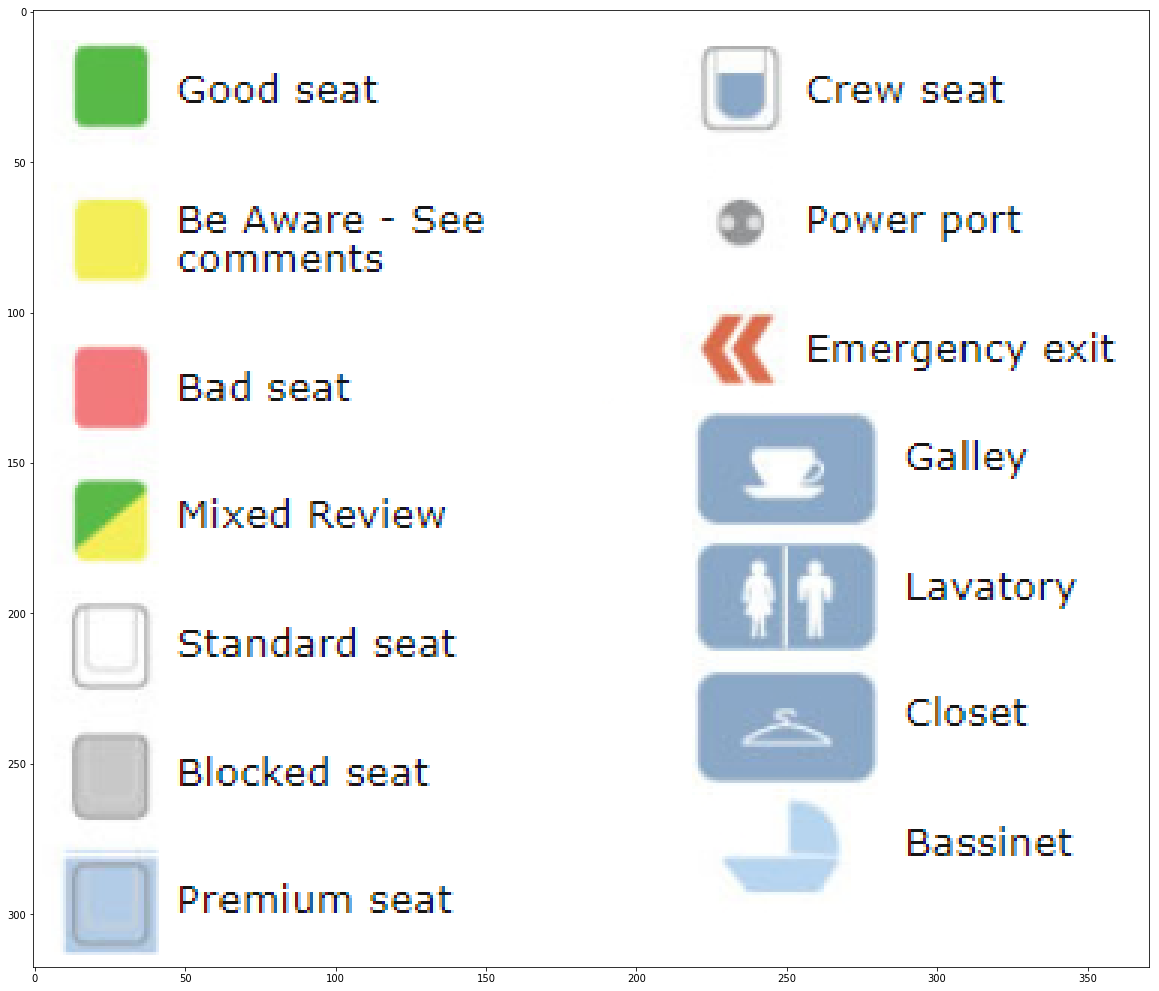

In [5]:
img = plt.imread(origin_path + '/ProjetInterpromo2020G8/images/Legende_SeatGuru.png')
# test image
plt.figure(figsize=(20,20))
plt.imshow(img)

In [47]:
# img = plt.imread(origin_path + '/ProjetInterpromo2020G8/images/Legende_SeatGuru.png')
img = plt.imread(origin_path + path_img_data + layout + 'Alitalia_Airlines_Boeing_777-200_plane153.jpg')
img_copy = img.copy()

# colour RGB for constituent elements
blue = [139, 168, 198]
yellow = [247, 237, 86]
green = [89, 185, 71]
red_bad_seat = [244, 121, 123]
red_exit = [222, 111, 100]

for i in range(img.shape[0]-1):
    for j in range(img.shape[1]-1):
        # in each row, for each pixel 
        pixel = [int(val) for val in img[i][j]]
        if (sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, blue)]) != 3 
            and sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, red_exit)]) != 3 
            and sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, yellow)]) != 3 
            and sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, green)]) != 3 
            and sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, red_bad_seat)]) != 3):
            # difference between RGB colours of oject and pixel to keep object in image
            img_copy[i][j] = [0., 0., 0.]


# plt.figure(0,figsize=(20,40))
# plt.imshow(img)
# plt.figure(1,figsize=(20,40))
# plt.imshow(img_copy)

## first conclusive test

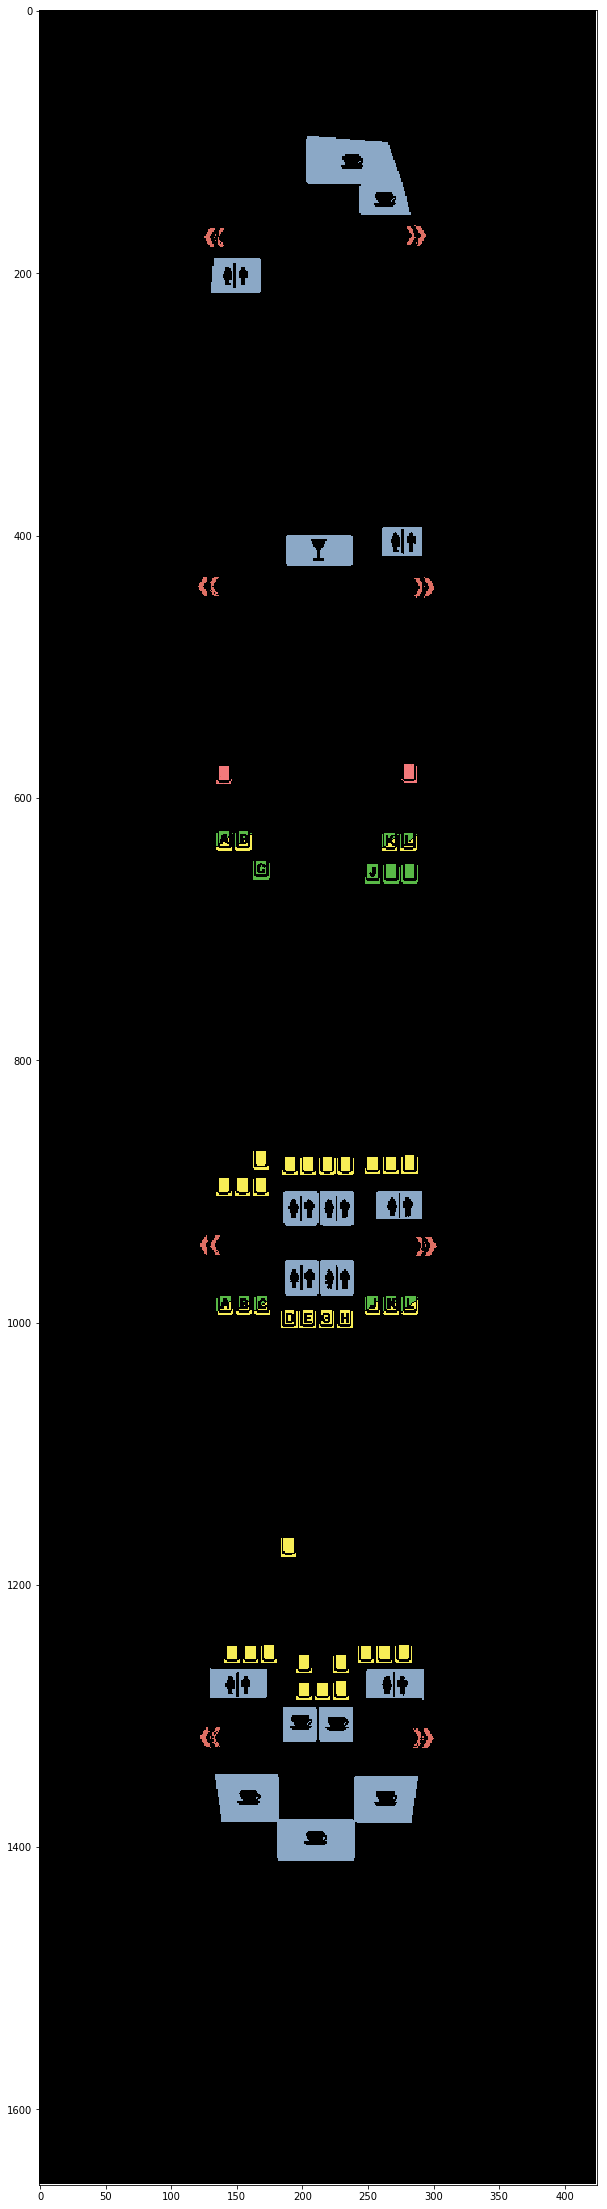

In [8]:
# img = plt.imread(origin_path + '/ProjetInterpromo2020G8/images/Legende_SeatGuru.png')

layout = "/LAYOUT SEATGURU/"

img = plt.imread(origin_path + path_img_data + layout + 'Alitalia_Airlines_Boeing_777-200_plane153.jpg')
img_copy = img.copy()

blue = [139, 168, 198]
yellow = [247, 237, 86]
green =  [89, 185, 71]
red_bad_seat =[244, 121, 123]
exit = [222, 111, 100]
for i in range(img.shape[0]-1):
    for j in range(img.shape[1]-1):
        pixel = [int(val) for val in img[i][j]]
        if sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, blue)]) == 3:
            img_copy[i][j] = blue
        elif sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, exit)]) == 3:
            img_copy[i][j] = exit 
        elif sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, yellow)]) == 3:
            img_copy[i][j] = yellow 
        elif sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, green)]) == 3:
            img_copy[i][j] = green 
        elif sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, red_bad_seat)]) == 3:
            img_copy[i][j] = red_bad_seat
        else:
            img_copy[i][j] = [0., 0., 0.]
plt.figure(figsize=(20,40))
plt.imshow(img_copy)

# clean up of the function

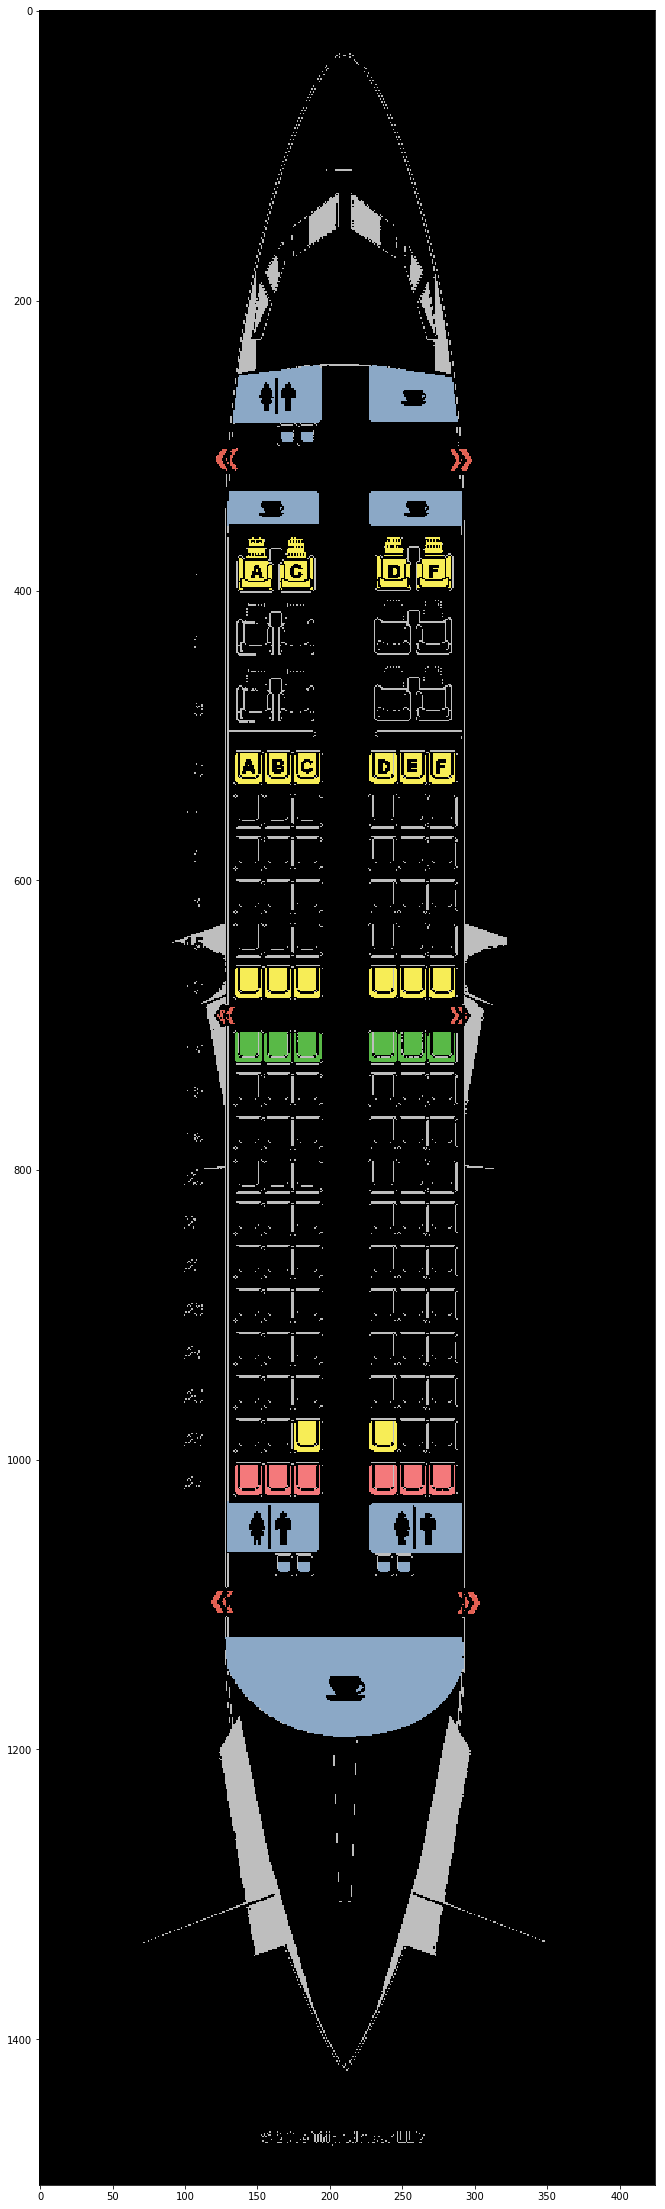

In [18]:
from PIL import Image

layout = "/LAYOUT SEATGURU/"

def visualisation(image):
    plt.figure(figsize=(20,40))
    plt.imshow(image.astype('uint8'))
    
def to_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def colour_detection(image, dico_colours, epsilon = 20, rgb_len = 3):
    # make a copy to avoid to erase the original image
    img_copy = to_rgb(image)
    
    # for each line we get the pixel value
    for i, line in enumerate(image):
        for j, pixel in enumerate(line):
            
            # Get only 3 first value corresponding to R,G,B
            pixel = [int(val) if val > 1.0 else int(val*255) for val in img[i][j]]            
            # default value
            img_copy[i][j] = [0, 0, 0]
            
            # for each colour we change the pixel value if we find the same colour
            for type_colour in dico_colours.keys():
                for c, colour in enumerate(dico_colours[type_colour]):
                    to_compare = dico_colours[type_colour][c]
                    if sum([1 if abs(p-b) < epsilon else 0 for p,b in zip(pixel, to_compare)]) == rgb_len:
                        img_copy[i][j] = colour
    return img_copy

# testing with png image
img = plt.imread(origin_path + path_img_data + layout + 
                 'Oman_Air_Boeing_737-700_new_plane686.jpg')

# dictionary of area in legend
dico_cols = {
    "blue":[[139, 168, 198],[41,182,209]], 
    "yellow": [[247, 237, 86],[251,200,2]], 
    "exit": [[222, 111, 100],[190,190,190]], 
    "green": [[89, 185, 71],[41,209,135]], 
    "red_bad_seat": [[244, 121, 123],[226,96,82]]
}

# test: correction with .astype('unit8')
visualisation(colour_detection(img, dico_cols))

In [11]:
# dico of colours first version

dico_cols = {
    "blue":[[139, 168, 198],[41,182,209],[81,101,181]], 
    "yellow": [[247, 237, 86],[251,200,2],[0,0,0]], 
    "exit": [[222, 111, 100],[190,190,190],[1,120,175]], 
    "green": [[89, 185, 71],[41,209,135],[120,189,198]], 
    "red_bad_seat": [[244, 121, 123],[226,96,82],[207,90,150]],
    "blue_seat_crew": [[140,169,202],[41,182,209],[138,165,190]],
    "baby": [[184,214,240],[197,197,197],[0,0,0]]
}

In [12]:
# dico of colours second version

dico_colours = {
    'seatguru': {
        'jpg':{
            "blue":[139, 168, 198], 
            "yellow": [247, 237, 86], 
            "exit": [222, 111, 100], 
            "green": [89, 185, 71], 
            "red_bad_seat": [244, 121, 123],
            "blue_seat_crew": [140,169,202],
            "baby": [184,214,240]
        },
        'png':{
            "blue":[41,182,209], 
            "yellow": [251,200,2], 
            "exit": [190,190,190], 
            "green": [41,209,135], 
            "red_bad_seat": [226,96,82],
            "blue_seat_crew": [41,182,209],
            "baby": [197,197,197]
        }
    },
    'maestro':{
        'png':{
            "blue":[81,101,181],
            "exit": [1,120,175], 
            "green": [120,189,198], 
            "red_bad_seat": [207,90,150],
            "blue_seat_crew": [138,165,190]
        }
    }
}

In [ ]:
def visualisation(image):
    plt.figure(figsize=(20,40))
    plt.imshow(image.astype('uint8'))
    
    
def colour_detection(image, dico_colours, img_type, file, epsilon = 20, rgb_len = 3):
    # img_type 0 si jpg, 1 si png, 2 pour png seat maestro
    # make a copy to avoid to erase the original image
    img_copy = image.copy()
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
    # for each line we get the pixel value
    for i, line in enumerate(image):
        for j, pixel in enumerate(line):
            # Get only 3 first value corresponding to R,G,B
            pixel = [int(val) if val > 1.0 else int(val*255) for val in image[i][j]][:rgb_len]
            # default value
            img_copy[i][j] = [0., 0., 0.]
            # for each colour we change the pixel value if we find the same colour
            for c, colour in enumerate(dico_colours[file][img_type]):
                to_compare = dico_colours[file][img_type][colour]
                if sum([1 if abs(p-b) < epsilon else 0 for p,b in zip(pixel, to_compare)]) == rgb_len:
                    img_copy[i][j] = dico_colours[file][img_type][colour]
    return img_copy

# img = plt.imread(origin_path + path_img_data + layout + 
#                  'Air_Canada_Boeing_777-300ER_Three_Class_v4_plane36.svg.png')
# img = plt.imread(origin_path + path_img_data + layout + 
#                  'Alitalia_Airlines_Boeing_777-200_plane153.jpg')


# res_img = colour_detection(img, dico_colours,'png','seatguru')
# visualisation(res_img)
# plt.imsave(origin_path + 
#            '/ProjetInterpromo2020G8/images_couleur/' + 
#             'Air_Canada_Boeing_777-300ER_Three_Class_v4_plane36.svg.png'
#            ,res_img.astype('uint8'))

In [ ]:
# img = plt.imread(origin_path + path_img_data + layout + 
#                  'Air_Canada_Boeing_777-300ER_Three_Class_v4_plane36.svg.png')
# img_copy = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # test of pixel modification

# for i, line in enumerate(img):
#         for j, pixel in enumerate(line):
#             # Get only 3 first value corresponding to R,G,B
#             pixel = [int(val*255) for val in img_copy[i][j]]
#             print(pixel)

# Saving the result image of colour_detection for a list of image name

In [ ]:
def doc_img(list_img, dico_cols, path, file):
    # file = LAYOUT SEATGURU or LAYOUT SEATMAESTRO
    for img in list_img:
        img1 = plt.imread(path +file+'/'+img)
        # img[-3:] == 'jpg' ou 'png'
        if file == 'LAYOUT SEATGURU':
            file1 = 'seatguru'
        else :
            file1 = 'maestro'
        res_img = colour_detection(img1, dico_cols, img[-3:], file1,22)
        plt.imsave('/home/sid2018-6/Documents/proget_interpromo/images_couleur/' + 
                   img,res_img.astype('uint8'))



In [17]:
# creation of a document of modifi image for celya testing

# list_img_celya = ['Aegean_Airlines_Airbus_A319-100_plane1.svg.png',
# 'Aegean_Airlines_Airbus_A320-200_plane2.svg.png',
# 'Aegean_Airlines_Airbus_A321-200_plane1.svg.png',
# 'Aegean_Airlines_Airbus_A321-200_plane3.svg.png',
# 'Aegean_Airlines_ATR_42-600_plane2.svg.png',
# 'Aegean_Airlines_Bombardier_Dash_8_Q400_plane5.svg.png',
# 'Aer_Lingus_Airbus_A320_plane9.jpg',
# 'Aer_Lingus_Airbus_A321_plane1.jpg',
# 'Aer_Lingus_Airbus_A321_plane10.jpg',
# 'Aer_Lingus_Airbus_A330-200_B_plane5.jpg']

# aer-lingus-airbus-a320

list_img_celya = ['Oman_Air_Boeing_737-700_new_plane686.jpg']
path = '/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/'

doc_img(list_img_celya, dico_colours, path, 'LAYOUT SEATGURU')

NameError: name 'doc_img' is not defined

In [14]:
# import the necessary packages

from skimage.measure import label, regionprops
import numpy as np
import pandas as pd
import os
import cv2 as cv2

from matplotlib import pyplot as plt
from matplotlib import image
import matplotlib.patches as mpatches

from skimage import io
import skimage.segmentation as seg
from skimage.segmentation import clear_border
import skimage.filters as filters
from skimage.filters import threshold_otsu
import skimage.draw as draw
import skimage.color as color
from skimage.color import label2rgb
from skimage.measure import label, regionprops
from skimage.morphology import closing, square

In [16]:
# segmentation with label image regions method / scikit-image
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])


# liste1 = os.listdir(
#     "/home/sid2018-6/Documents/proget_interpromo/images_couleur")
# liste2 = os.listdir("C:/Users/marce/Documents/interpromo_2020"
#                     "/images_test_sinvert")
liste1 = ['Oman_Air_Boeing_737-700_new_plane686.jpg']

def image_process_label(image):
    grayscale = rgb2gray(image)
    thresh = threshold_otsu(grayscale)
    bw = closing(grayscale > thresh, square(2))
    cleared = clear_border(bw)
    label_image = label(cleared)
    return label_image


def dictionnaires_results(liste_images, path):
    ar_elmt = {}
    coor_rect_dic = {}
    diam_cercle_dic = {}
    coordinates_dic = {}
    for img in liste_images:
        # get the image
        image = plt.imread(
            path + img)
        # get the différent area 
        label_image = image_process_label(image)
        props = regionprops(label_image)
    
        fig, ax = plt.subplots(figsize=(20, 40))
        ax.imshow(image)
        # list for areas, diametres, coordinates etc..
        area_list = []
        coor_rect = []
        diam_cercle = []
        coordinates = []
        for region in props:
            # bigger enough area chosen
            if region.area >= 30:
                # draw rectangles around the defined areas
                minr, minc, maxr, maxc = region.bbox
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                ax.add_patch(rect)
#                 plt.axes().add_patch(rect)
#                 ax.set_axis_off()
#                 plt.figure()
#                 plt.tight_layout()  
                area_list.append(region['Area'])  # Area of each region
                # Coordinate list of the rectangle edges
                coor_rect.append(region['BoundingBox'])
                # The diameter of a circle with the same area as the region
                diam_cercle.append(region['EquivDiameter'])
                # Coordinate list (row, col) of each region
                coordinates.append(region['Coordinates'])
        plt.tight_layout() # lay out of the image and the rectangles
        plt.show()
        fig.savefig('/home/sid2018-6/Documents/proget_interpromo/images_couleur_squared/rect' +
                    img, dpi=90, bbox_inches='tight')
        ar_elmt[img] = area_list
        coor_rect_dic[img] = coor_rect
        diam_cercle_dic[img] = diam_cercle
        coordinates_dic[img] = coordinates
    return (ar_elmt, coor_rect_dic, diam_cercle_dic, coordinates_dic)


(liste1_aires, liste1_coor_rect, liste1_diam_cercle, liste1_coordinates) = dictionnaires_results(
    liste1, "/home/sid2018-6/Documents/proget_interpromo/images_couleur/")
# (liste2_aires, liste2_coor_rect, liste2_diam_cercle, liste2_coordinates) = dictionnaires_results(
#     liste2, "C:/Users/marce/Documents/interpromo_2020/images_test_sinvert/")

FileNotFoundError: [Errno 2] No such file or directory: '/home/sid2018-6/Documents/proget_interpromo/images_couleur/Oman_Air_Boeing_737-700_new_plane686.jpg'

In [69]:
img_name = 'Aer_Lingus_Airbus_A321_plane10.jpg'

img = cv2.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 
                img_name)

img_pre_pross = cv2.imread('/home/sid2018-6/Documents/proget_interpromo/images_couleur/' + img_name)
img_squared = cv2.imread('/home/sid2018-6/Documents/proget_interpromo/images_couleur_squared/rect' + img_name)

print(img.size, img_pre_pross.size, img_squared.size)

2478600 2478600 9017001


In [70]:
def liste_tuple(list_coord):
    list_tuple = []
    for squar in list_coord:
        list_tuple.append([(squar[0],squar[1]),(squar[2],squar[3])])
    return list_tuple

list_tuple = liste_tuple(liste1_coor_rect[img_name])

In [71]:
# print(liste1_coor_rect['Aer_Lingus_Airbus_A330-200_plane4.jpg'])
list_tuple

[[(207, 133), (252, 191)],
 [(207, 217), (253, 290)],
 [(261, 122), (277, 130)],
 [(261, 130), (276, 137)],
 [(262, 285), (277, 293)],
 [(262, 293), (277, 301)],
 [(286, 130), (315, 195)],
 [(286, 227), (315, 292)],
 [(320, 306), (1474, 349)],
 [(601, 122), (612, 128)],
 [(601, 288), (613, 294)],
 [(601, 293), (613, 300)],
 [(877, 334), (884, 340)],
 [(913, 334), (920, 340)],
 [(1053, 122), (1064, 128)],
 [(1053, 293), (1065, 300)],
 [(1477, 130), (1512, 195)],
 [(1477, 227), (1512, 292)],
 [(1524, 119), (1539, 127)],
 [(1525, 296), (1539, 304)],
 [(1552, 130), (1629, 292)]]

# PIPELINE : IDENTIFY COLOURED ELEMENTS

by William

In [19]:
# import the necessary packages

import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
from collections import defaultdict
from PIL import Image
from tqdm import tqdm_notebook as tqdm


from matplotlib import image
import matplotlib.patches as mpatches
from skimage import io
import skimage.segmentation as seg
from skimage.segmentation import clear_border
import skimage.filters as filters
from skimage.filters import threshold_otsu
import skimage.draw as draw
import skimage.color as color
from skimage.color import label2rgb
from skimage.measure import label, regionprops
from skimage.morphology import closing, square

In [71]:
COLOURS = {
        'LAYOUT SEATGURU': {
            'jpg':{
                "blue":[139, 168, 198],
                "yellow": [247, 237, 86],
                "exit": [222, 111, 100],
                "green": [89, 185, 71],
                "red_bad_seat": [244, 121, 123],
#                 "blue_seat_crew": [140,169,202],
#                 "baby": [184,214,240]
            },
            'png':{
                "blue":[41,182,209],
                "yellow": [251,200,2],
                "exit": [190,190,190],
                "green": [41,209,135],
                "red_bad_seat": [226,96,82],
                "blue_seat_crew": [41,182,209],
#                 "baby": [197,197,197]
            }
        },
        'LAYOUT SEATMAESTRO': {
            'png': {
                "blue":[81,101,181],
                "exit": [1,120,175],
                "green": [120,189,198],
                "red_bad_seat": [207,90,150],
                "blue_seat_crew": [138,165,190] 
            }
        }
    }

In [72]:

class ImageUtil():
    def __init__(self, input_path, image_name, image=None):
        self.input_path = input_path
        self.image_name = image_name
        if image is  None:
            self.image_pil = Image.open(self.input_path + self.image_name)
            self.image_plt = plt.imread(self.input_path + self.image_name)
            self.image = image
        else:
            self.image_pil = image
            self.image_plt = image
            self.image = image
        
        self.sort_pixel = {}
        
    def sort_pixel(self):
        """
            Sort the pixel value by number of occurences that they appear in the image
        """
        by_color = defaultdict(int)
        for pixel in self.image_pil.getdata():
            by_color[pixel] += 1

        self.sort_pixel =  {k: v for k, v in sorted(by_color.items(), key=lambda item: item[1], reverse=True)}

    def visualisation(self, x_size, y_size):
        """
            Show the image
            params : 
                x_size - width of the plot
                y_size - height of the plot
        """
        plt.figure(figsize=(x_size,y_size))
        if self.image is not None:
            plt.imshow(self.image.astype('uint8'))
        else:
            plt.imshow(self.image_plt.astype('uint8'))

    def to_rgb(self):
        """
            Convert the image to an RGB format from a BGR format
        """
        return cv.cvtColor(self.image_plt, cv.COLOR_BGR2RGB)

class Colour():
    
    def __init__(self, input_path, layout, image_name):
        self.input_path = input_path
        self.layout = layout
        self.image_name = image_name
        self.image_extension = image_name.split('.')[-1]
        
        self.image = plt.imread(self.input_path + self.layout + '/' + self.image_name)
        self.image_util = ImageUtil(self.input_path + self.layout + '/', self.image_name)
        
    def colour_detection(self, colours, epsilon, rgb_len, colour_mode, default_colour):
        """
            This function will detect the colour and will do some pre-process on it
            params : 
                colours : a dictionnary with a list of specified colours
                epsilon : threshold that allows to consider a colour from another one as close
                rgb_len : only take the 3 first elements from pixel (RGB norm)
                colour_mode : 
                    if true : it means that if we consider a colour from the image close 
                    to a colour from the "colours" dict, then it will replace the colour 
                    by the one in the dict. 
                    if false : it means that if we consider a colour from the image close 
                    to a colour from the "colours" dict, then it will replace the colour 
                    by the default color value.
                default_color : default color value that a pixel has to take
        """
        # make a copy to avoid to erase the original image
        img_copy = self.image_util.to_rgb()

        # for each line we get the pixel value
        for i, line in enumerate(self.image):
            for j, pixel in enumerate(line):
                # Get only 3 first value corresponding to R,G,B
                pixel = [int(val) if val >  1.0 else int(val*255) for val in self.image[i][j]][:rgb_len]

                # if we want to show a specific colour
                if colour_mode:
                    # default value
                    img_copy[i][j] = default_colour

                    # for each colour we change the pixel value if we find the same colour
                    for colour in colours.values():
                        if sum([1 if abs(p-b) < epsilon else 0 for p,b in zip(pixel, colour)]) == rgb_len:
                            img_copy[i][j] = colour

                # if we want to hide a colour by a default value
                else:
                    # default value
                    img_copy[i][j] = pixel

                    # for each recognized colour, we change it by the default value
                    for colour in colours.values():
                            if sum([1 if abs(p-b) < epsilon else 0 for p,b in zip(pixel, colour)]) == rgb_len:
                                img_copy[i][j] = default_colour
        return img_copy


    def colour_pipeline(self, colours = {}, epsilon = 20, colour_mode = True, 
                    default_colour = [0, 0, 0], rgb_len = 3):
        """
            Call colour_detection function in order to pre-process colours in image
            params : 
                colours : a dictionnary with a list of specified colours
                epsilon : threshold that allows to consider a colour from another one as close
                rgb_len : only take the 3 first elements from pixel (RGB norm)
                colour_mode : 
                    - if true (highlight colours in "colours" dict by standardize it) : it means that 
                    if we consider a colour from the image close to a colour from the "colours" dict, 
                    then it will replace the colour by the one in the dict. 
                    - if false (remove colours in "colours" dict by the default one) : it means that 
                    if we consider a colour from the image close to a colour from the "colours" dict, 
                    then it will replace the colour by the default color value.
                default_color : default color value that a pixel has to take
        """
        # if colours is empty we take the default value
        if not bool(colours): colours = COLOURS[self.layout][self.image_extension]
            
        # get the image result from colour decection pre-process wanted
        image_res = self.colour_detection(colours, epsilon, rgb_len, colour_mode, default_colour)

        return image_res

## STEP 1 : pre-process
### Create pre-processed images to highlights coloured elements

In [73]:
# paths to change
data_path= '/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/'
layouts = ['LAYOUT SEATGURU', 'LAYOUT SEATMAESTRO']

# # path where the base image are stored
# input_path = data_path + layouts[0] + '/'

# # path where the pre-processed images will be stored
# pre_processed_path = data_path + 'images_pre_processed/' 
# # if not os.path.isdir(pre_processed_path): os.mkdir(pre_processed_path)
    
# # path where the pre-processed images with rectangles will be stored
# drawing_rectangles_path = data_path + 'drawing_rectangles/' 
# # if not os.path.isdir(drawing_rectangles_path): os.mkdir(drawing_rectangles_path)
    
# dataframe_path = data_path + 'dataframe_rectangles/' 
# # if not os.path.isdir(dataframe_path): os.mkdir(dataframe_path)    
    
# # pre-process the N first image from "LAYOUT_SEATGURU" or "LAYOUT_SEATMAESTRO" dataset
# # N = 2

# liste = tqdm(os.listdir(input_path)[:N])
image_name = 'Aer_Lingus_Airbus_A321_plane10.jpg'

# Create a Colour object
col_obj = Colour(data_path, layouts[0], image_name)
    
# Make a colour detection based on the layout type ('GURU' or 'MAESTRO') and image type('png', 'jpg')
im_pre_process  = col_obj.colour_pipeline(colours = {}, epsilon = 30, colour_mode = True, 
                       default_colour = [0, 0, 0], rgb_len = 3)
    
# Save the pre-processed image
# plt.imsave(pre_processed_path + image_name, img_res.astype('uint8'))

## STEP 2 : process
Apply an algorithm that will detect every coloured elements on an image. It will store information (rectangle position, coordinates, diameter, area) about those coloured elements in a dataframe

In [79]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])


def image_process_label(image):
    grayscale = rgb2gray(image)
    thresh = threshold_otsu(grayscale)
    bw = closing(grayscale > thresh, square(3))
    cleared = clear_border(bw)
    label_image = label(cleared)
    return label_image

def label_results(image, im_name , min_rectangle_area = 80):
    # the result will be store in this list
    image_detection_result = []
        
    # get the different area
    label_image = image_process_label(image)
    props = regionprops(label_image)

    # prepare the image info
    image_detection_result.append({
        'name_im': im_name,
        "areas": [],
        "rectangles": [],
        "diameters": [],
        "coordinates": []
    })
        
    # the last index in the list
    len_list = len(image_detection_result) - 1
        
    # by region find every rectangle that will interesting us
    for region in props:
        # bigger enough area chosen
        if region.area >= min_rectangle_area:
            image_detection_result[len_list]['areas'].append(region['Area'])
            image_detection_result[len_list]['rectangles'].append(region['BoundingBox'])
            image_detection_result[len_list]['diameters'].append(region['EquivDiameter'])
            image_detection_result[len_list]['coordinates'].append(region['Coordinates'])
                
    return pd.DataFrame(image_detection_result)

# Get the path + image_name info
# images_path_list = [pre_processed_path + img for img in os.listdir(pre_processed_path)]
df = label_results(im_pre_process, image_name)

# df.to_csv(dataframe_path + 'dataframe.csv', sep=',', index=False)

In [83]:
print(df['rectangles'][0])
l = []
for rect in df['rectangles'][0]:
    l.append(abs(rect[0]-rect[2])*abs(rect[1]-rect[3]))
print(l)
print(df['areas'][0])

[(207, 132, 252, 191), (207, 218, 253, 290), (261, 121, 277, 137), (262, 285, 277, 301), (286, 130, 315, 195), (286, 227, 315, 292), (324, 134, 347, 193), (325, 227, 346, 287), (545, 268, 566, 287), (546, 134, 567, 153), (576, 227, 598, 266), (577, 154, 598, 194), (600, 122, 612, 134), (601, 288, 613, 300), (618, 133, 640, 194), (619, 227, 640, 288), (1029, 227, 1050, 266), (1030, 154, 1051, 193), (1052, 122, 1064, 134), (1053, 288, 1065, 300), (1071, 133, 1094, 194), (1072, 226, 1093, 288), (1419, 175, 1440, 194), (1419, 228, 1441, 247), (1450, 134, 1471, 194), (1451, 228, 1472, 289), (1477, 130, 1512, 195), (1477, 227, 1511, 292), (1524, 119, 1539, 134), (1524, 289, 1540, 304), (1552, 130, 1631, 293)]
[2655, 3312, 256, 240, 1885, 1885, 1357, 1260, 399, 399, 858, 840, 144, 144, 1342, 1281, 819, 819, 144, 144, 1403, 1302, 399, 418, 1260, 1281, 2275, 2210, 225, 240, 12877]
[2140, 2908, 163, 137, 1657, 1762, 1102, 1151, 374, 377, 781, 807, 102, 107, 1227, 1148, 788, 806, 102, 107, 1217, 

In [91]:
def give_meta_colours(df_im, img, layout):
    
    rectangles = {}
    col = COLOURS[layout][df_im['name_im'][0][-3:]]
    # create keys of rectangle dictionary with the colors name
    for colour in col.keys():
        rectangles[colour] = []
        
    rectangles['error'] = []
    rectangles['double'] = []
        
    for r, rect in enumerate(df_im['rectangles'][0]):
#         print('~~~~~~')
        left_x, right_x, left_y, right_y = rect[0], rect[2], rect[1], rect[3]
        rect_size = df_im['areas'][0][r]
#         print(rect_size)
        # count the number of coloured pixel and keep the colour
        nb_rect_col = 0
        cond_end = 0
        for i,line in enumerate(img[left_y:right_y, left_x:right_x]):
            for j,pixel in enumerate(line):
                for colour in col.keys():
                    if sum([1 if p == b else 0 for p,b in zip(pixel, col[colour])]) == 3:
                        if rect not in rectangles[colour]:
                            rectangles[colour].append(rect)
                
    return rectangles
                
            
        
layout = 'LAYOUT SEATGURU'
give_meta_colours(df, im_pre_process, layout)
# plt.subplots(figsize=(20, 40))
# plt.imshow(im_pre_process)

{'blue': [(207, 132, 252, 191),
  (207, 218, 253, 290),
  (262, 285, 277, 301),
  (286, 227, 315, 292)],
 'yellow': [],
 'exit': [(286, 227, 315, 292)],
 'green': [],
 'red_bad_seat': [(286, 227, 315, 292)],
 'error': [],
 'double': []}

In [ ]:
give_meta_colours(df, dict_im, layout)

# STEP 2.5 : metadata dominante colour

give for each rectangle the colour dominante (the element)

In [113]:
dico = {}
list_id = ['1','2','3']
for i in list_id:
    dico[i]=[]
dico['1'].append(3)
dico

{'1': [3], '2': [], '3': []}

## STEP 3 : drawing rectangles and store them
Show visuals with rectangles that identify coloured elements on the image

In [66]:
def to_rgb(image):
        return cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
def draw_contour(input_path, output_path, image_name, rectangles, contour_colour = (255,255, 255)):
    image = cv.imread(input_path + image_name)
    image = to_rgb(image) # change color postion BGR to RGB
    
    # for each rectangles it will draw it on the image
    for rect in rectangles:
        y, x = rect[0], rect[1]
        w, h = abs(x-rect[3]), abs(y-rect[2])
        image = cv.rectangle(image, (x,y), (x+w, y+h), contour_colour, 2)
    
    # save the image with te drawed rectangles on it
    plt.imsave(output_path + image_name, image)

# get rectangles and image_names
images_names = df['image_name'].tolist()
rectangles_list = df['rectangles'].tolist()

# for each image draw rectangle and save it
for rectangles, image_name in tqdm(zip(rectangles_list, images_names)):
    draw_contour(pre_processed_path, drawing_rectangles_path, image_name, rectangles)


In [79]:
def coord_pattern_finder(image, template, threshold: float):
    """
    input:
        image : image plane cv2.imread() black and white
        template : image pattern cv2.imread() black and white
        threshold : threshold for this pattern
    output:
        position : list right angle position for this pattern on the image

    """
    position = []  # Variable output
    # List of match
    res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    for pos in zip(*np.where(res >= threshold)[::-1]):
        position.append(pos)
    return(position)


In [ ]:

path_image = '/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Aer_Lingus_Airbus_A320_plane9.jpg'
templates = ['/home/sid2018-6/Documents/proget_interpromo/ProjetInterpromo2020G8/' + 
             'images/templateNormalSeat-SansBlanc.png']
thresholds = [0.60, 0.60, 0.63]
img = cv2.imread(path_image, 0)
template = cv2.imread(templates[0], 0)
h, w = template.shape
img_rgb = cv2.imread(path_image, 1)

position = coord_pattern_finder(img, template, 0.6)

for pos in position:
    cv2.rectangle(img_rgb, pos, (pos[0] + w, pos[1] + h), (0, 0, 255), 2)

cv2.imshow('test', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()

In [29]:
def neighboors(image, x, y, step=1):
    neighboors_val = []
    (a, b) = get_shape(image)
    for x_neig in range (x-step, x+1+step):
        if x_neig >= 0 and x_neig < a:
            for y_neig in range (y-step, y+1+step):
                if  y_neig >= 0 and y_neig < b:
                    if image[x_neig,y_neig] == 0:
                        if x_neig == x or y_neig == y:
                            neighboors_val.append([x_neig, y_neig])
    return neighboors_val

# x, y = 0,0
# x_y_neighboors(img, x, y)


def dijkstra(img, rectangles, seats, begin, end):
    # img = size rectangles and seat
    (a,b) = img.shape[:2]
    # img copy for modification
    img_copy = img.copy()
    
    # for each line, each pixel, 1 = obstacle, 0 = path
    for line in range(a):
        for pixel in range(b):
            img_copy[line][pixel] = 0
    
    for rect in rectangles:
        for line_rect in range(rect[0],rect[2]):
            for pixel_rect in range(rect[1],rect[3]):
                img_copy[line_rect][pixel_rect] = 1
    
    for seat in seats:
        pix = seat[0]
        pix[0] = pix[0]+seat[1]/2
        pix[1] = pix[1]+seat[2]/2
        img_copy[pix[0],pix[1]] = 1
        for line_pxl in range(seat[1][0], seat[1][0]+seat[1]):
            img_copy[pix[0],line_pxl] = 1
    
    pix_path = [begin]
    point = begin
    
    while point != end:
        list_neighboors = neighboors(img_copy, point[0], point[1])
        dist = []
        for neig in list_neighboors:
            dist.append(sqrt((neig[0]-end[0])**2 + (neig[1]-end[1])**2))
        ind = dist.index(min(dist))
        point = list_neighboors[ind]
        pix_path.append(point)
    
    return pix_path


img = dict_im_pre_process['Aer_Lingus_Airbus_A321_plane10.jpg']
rectangles = [[(206, 217), (253, 290)],
 [(207, 133), (252, 194)],
 [(266, 122), (281, 130)],
 [(266, 131), (281, 137)],
 [(266, 292), (282, 300)],
 [(267, 285), (282, 293)],
 [(639, 125), (651, 133)],
 [(643, 294), (651, 299)],
 [(678, 126), (690, 133)],
 [(678, 294), (690, 299)],
 [(1184, 140), (1187, 149)],
 [(1184, 230), (1188, 242)],
 [(1198, 130), (1233, 196)],
 [(1199, 226), (1234, 292)],
 [(1246, 119), (1261, 127)],
 [(1247, 296), (1262, 304)],
 [(1273, 130), (1350, 292)]]
seats = [((134, 311), 61, 303),
 ((225, 311), 61, 303),
 ((134, 692), 61, 450),
 ((225, 692), 61, 450)]
begin = seats[0]
end = rectangles[3][0][0],rectangles[3][1][0]
print(dijkstra(img, rectangles, seats, begin, end))
    
    

IndexError: list index out of range

In [23]:
img_copy = img.copy()
img_copy

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

# Edges plane

In [76]:
# img = dict_im_pre_process['Aer_Lingus_Airbus_A321_plane10.jpg']
# rectangles = [[(206, 217), (253, 290)],
#  [(207, 133), (252, 194)],
#  [(266, 122), (281, 130)],
#  [(266, 131), (281, 137)],
#  [(266, 292), (282, 300)],
#  [(267, 285), (282, 293)],
#  [(639, 125), (651, 133)],
#  [(643, 294), (651, 299)],
#  [(678, 126), (690, 133)],
#  [(678, 294), (690, 299)],
#  [(1184, 140), (1187, 149)],
#  [(1184, 230), (1188, 242)],
#  [(1198, 130), (1233, 196)],
#  [(1199, 226), (1234, 292)],
#  [(1246, 119), (1261, 127)],
#  [(1247, 296), (1262, 304)],
#  [(1273, 130), (1350, 292)]]
# # point en bas a gauche puis largeur et hauteur
# seats = [((134, 311), 61, 303),
#  ((225, 311), 61, 303),
#  ((134, 692), 61, 450),
#  ((225, 692), 61, 450)]
# print(df['rectangles'][0])

In [77]:
# # ymax
# print(rectangles[0][1][0])
# # ymin
# print(rectangles[0][1][1])
# # xmin
# print(seats[0][0][0])
# # xmax
# print(seats[0][0][0]+seats[0][1])

# print(len(rectangles))

In [78]:
# def plane_edge_min_max(img, seats, rectangles):
#     # keep img if we supress seats and rectangles and create them in the function
#     # seats = position of seat for that img
#     # rectangles = position of zone for that img
#     edge = [[seats[0][0][0],rectangles[0][1][0]],[seats[0][0][0]+seats[0][1],rectangles[0][1][1]]]
#     for rect in range(1,len(rectangles)):
#         edge[0][1] = min(edge[0][1],rectangles[rect][0][0])
#         edge[1][1] = max(edge[1][1],rectangles[rect][0][1])
#     for seat in range(1,len(seats)):
#         edge[0][0] = min(edge[0][0],seats[seat][0][0])
#         edge[1][0] = max(edge[1][0],seats[seat][0][0]+seats[seat][1])
#     return edge
        
# img = dict_im_pre_process['Aer_Lingus_Airbus_A321_plane10.jpg']

# # point en haut a gauche x1,y1 en bas a droite x2,y2
# rectangles = [[(207, 133), (252, 191)],
#  [(207, 217), (253, 290)],
#  [(261, 122), (277, 130)],
#  [(261, 130), (276, 137)],
#  [(262, 285), (277, 293)],
#  [(262, 293), (277, 301)],
#  [(286, 130), (315, 195)],
#  [(286, 227), (315, 292)],
#  [(601, 122), (612, 128)],
#  [(601, 288), (613, 294)],
#  [(601, 293), (613, 300)],
#  [(1053, 122), (1064, 128)],
#  [(1053, 293), (1065, 300)],
#  [(1477, 130), (1512, 195)],
#  [(1477, 227), (1512, 292)],
#  [(1524, 119), (1539, 127)],
#  [(1525, 296), (1539, 304)],
#  [(1552, 130), (1629, 292)]]

# # point en bas a gauche puis largeur et hauteur
# seats = [((134, 311), 61, 303),
#  ((225, 311), 61, 303),
#  ((134, 692), 61, 450),
#  ((225, 692), 61, 450)]

# edge = plane_edge_min_max(img, seats, rectangles)
# # fig, ax = plt.subplots(figsize=(20, 40))
# # ax.imshow(img)
# # # draw rectangles around the defined areas
# # minr, minc, maxr, maxc = region.bbox
# # rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
# #                                           fill=False, edgecolor='red', linewidth=2)
# # ax.add_patch(rect)
# # plt.tight_layout() # lay out of the image and the rectangles
# # plt.show()

# # y, x = 207, 217
# # w, h = abs(x-290), abs(y-253)

# y, x = edge[0]
# w, h = abs(x-edge[1][1]), abs(y-edge[1][0])
# image = cv.rectangle(img, (x,y), (x+w, y+h), (255,255, 255), 2)

# plt.figure(figsize=(20,40))
# plt.imshow(image)


In [79]:
# fig, ax = plt.subplots(figsize=(20, 40))
# ax.imshow(img)
# # (207, 133), (252, 191)
# # rect = mpatches.Rectangle((133, 191), 207 - 133, 252 - 191,
# #                                           fill=False, edgecolor='red', linewidth=2)
# (207, 217), (253, 290)
# y, x = 207, 217
# w, h = abs(x-290), abs(y-253)
# image = cv.rectangle(image, (x,y), (x+w, y+h), (255,255, 255), 2)
# rect = mpatches.Rectangle((217, 290), 207 - 217, 253 - 290,
#                                           fill=False, edgecolor='red', linewidth=2)
# # y, x = rect[1], rect[1]
# # w, h = abs(x-rect[3]), abs(y-rect[2])
# ax.add_patch(rect)
# plt.show()

[[[ 293 1521  293 1067]]

 [[ 128 1050  128  716]]

 [[ 325 1465  325  976]]

 ...

 [[ 289  875  289  889]]

 [[ 287  851  287  841]]

 [[ 348 1177  348 1188]]]


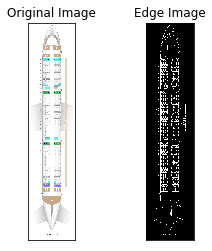

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1944, 425)


In [135]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data'+
                 '/ANALYSE IMAGE/LAYOUT SEATGURU/Aer_Lingus_Airbus_A321_plane10.jpg')
# Aer_Lingus_Airbus_A330-300_A_plane8.jpg
edges = cv2.Canny(img,50,150)


minLineLength = 50
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength,maxLineGap)

print(lines)

for x1,y1,x2,y2 in lines[0]:
    edges = cv2.line(edges,(x1,y1),(x2,y2),(0,0,255),2)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


plt.show()